In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sbn


In [2]:
AudiData=pd.read_csv("audi.csv")

In [3]:
AudiData.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,A1,2017,12500,Manual,15735,Petrol,150,55.4,1.4
1,A6,2016,16500,Automatic,36203,Diesel,20,64.2,2.0
2,A1,2016,11000,Manual,29946,Petrol,30,55.4,1.4
3,A4,2017,16800,Automatic,25952,Diesel,145,67.3,2.0
4,A3,2019,17300,Manual,1998,Petrol,145,49.6,1.0


In [4]:
AudiData.model.unique()

array([' A1', ' A6', ' A4', ' A3', ' Q3', ' Q5', ' A5', ' S4', ' Q2',
       ' A7', ' TT', ' Q7', ' RS6', ' RS3', ' A8', ' Q8', ' RS4', ' RS5',
       ' R8', ' SQ5', ' S8', ' SQ7', ' S3', ' S5', ' A2', ' RS7'],
      dtype=object)

In [6]:
AudiData.isnull().sum()

model           0
year            0
price           0
transmission    0
mileage         0
fuelType        0
tax             0
mpg             0
engineSize      0
dtype: int64

In [7]:
AudiData.corr()["price"].sort_values()

mpg          -0.600334
mileage      -0.535357
tax           0.356157
engineSize    0.591262
year          0.592581
price         1.000000
Name: price, dtype: float64

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price', ylabel='Density'>

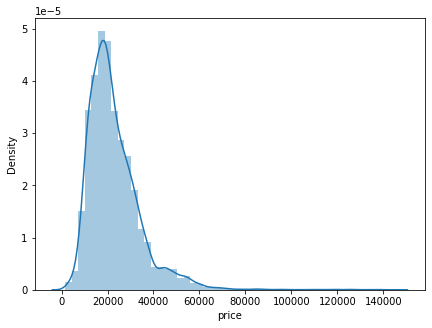

In [8]:
plt.figure(figsize=(7,5))
sbn.distplot(AudiData["price"])

In [9]:
len(AudiData)

10668

In [10]:
len(AudiData)*0.01


106.68

In [19]:
y=AudiData.sort_values("price",ascending=False).iloc[105:]

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price', ylabel='Density'>

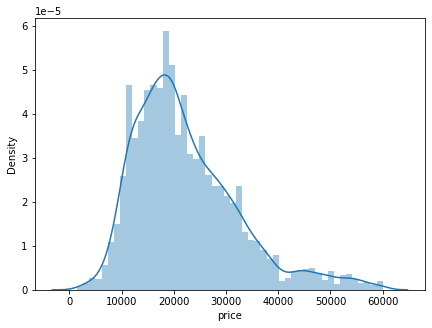

In [20]:
plt.figure(figsize=(7,5))
sbn.distplot(y["price"])

In [21]:
AudiData.groupby("year").mean()["price"]

year
1997     4650.000000
1998     4999.000000
2002     2433.000000
2003     3408.333333
2004     5053.600000
2005     3490.714286
2006     6499.111111
2007     7325.250000
2008     6281.428571
2009     6281.956522
2010     7224.093750
2011     8944.808511
2012     9860.811765
2013    11690.790378
2014    13890.659955
2015    15128.235235
2016    16908.725051
2017    19951.624289
2018    26296.707176
2019    30410.752268
2020    35967.067039
Name: price, dtype: float64

In [22]:
AudiData=y

In [23]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn import preprocessing

In [24]:
onehotencoder = preprocessing.OneHotEncoder()

In [25]:
AudiData['transmission'] = pd.Categorical(AudiData['transmission'])
dfDummies = pd.get_dummies(AudiData['transmission'], prefix = 'Trans')
dfDummies

,Trans_Automatic,Trans_Manual,Trans_Semi-Auto
524,0,0,1
7221,0,0,1
222,1,0,0
5129,1,0,0
4100,1,0,0
...,...,...,...
7404,0,1,0
10108,0,1,0
7795,0,1,0
10552,0,1,0


In [26]:
AudiData=pd.concat([AudiData, dfDummies], axis=1)

In [27]:
AudiData=AudiData.drop("transmission",axis=1)
AudiData.head()

,model,year,price,mileage,fuelType,tax,mpg,engineSize,Trans_Automatic,Trans_Manual,Trans_Semi-Auto
524,RS5,2019,59995,5089,Petrol,145,30.1,2.9,0,0,1
7221,A5,2020,59995,2000,Diesel,150,40.9,3.0,0,0,1
222,Q7,2019,59995,10,Diesel,145,33.2,3.0,1,0,0
5129,Q7,2019,59990,3988,Diesel,145,32.8,3.0,1,0,0
4100,RS4,2019,59990,5121,Petrol,145,29.1,2.9,1,0,0


In [28]:
onehotencoder2 = preprocessing.OneHotEncoder()

In [29]:
AudiData['fuelType'] = pd.Categorical(AudiData['fuelType'])
dfDummies2 = pd.get_dummies(AudiData['fuelType'], prefix = 'Ftype')
dfDummies2

,Ftype_Diesel,Ftype_Hybrid,Ftype_Petrol
524,0,0,1
7221,1,0,0
222,1,0,0
5129,1,0,0
4100,0,0,1
...,...,...,...
7404,1,0,0
10108,0,0,1
7795,0,0,1
10552,1,0,0


In [30]:
AudiData=pd.concat([AudiData, dfDummies2], axis=1)

In [31]:
AudiData=AudiData.drop("fuelType",axis=1)

In [32]:
AudiData.head()

,model,year,price,mileage,tax,mpg,engineSize,Trans_Automatic,Trans_Manual,Trans_Semi-Auto,Ftype_Diesel,Ftype_Hybrid,Ftype_Petrol
524,RS5,2019,59995,5089,145,30.1,2.9,0,0,1,0,0,1
7221,A5,2020,59995,2000,150,40.9,3.0,0,0,1,1,0,0
222,Q7,2019,59995,10,145,33.2,3.0,1,0,0,1,0,0
5129,Q7,2019,59990,3988,145,32.8,3.0,1,0,0,1,0,0
4100,RS4,2019,59990,5121,145,29.1,2.9,1,0,0,0,0,1


In [33]:
onehotencoder3 = preprocessing.OneHotEncoder()

In [35]:
AudiData['model'] = pd.Categorical(AudiData['model'])
dfDummies3 = pd.get_dummies(AudiData['model'], prefix = 'model')
dfDummies3

,model_ A1,model_ A2,model_ A3,model_ A4,model_ A5,model_ A6,model_ A7,model_ A8,model_ Q2,model_ Q3,...,model_ RS5,model_ RS6,model_ RS7,model_ S3,model_ S4,model_ S5,model_ S8,model_ SQ5,model_ SQ7,model_ TT
524,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
7221,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
222,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5129,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4100,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7404,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10108,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
7795,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10552,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [36]:
AudiData=pd.concat([AudiData, dfDummies3], axis=1)

In [38]:
AudiData

,model,year,price,mileage,tax,mpg,engineSize,Trans_Automatic,Trans_Manual,Trans_Semi-Auto,...,model_ RS5,model_ RS6,model_ RS7,model_ S3,model_ S4,model_ S5,model_ S8,model_ SQ5,model_ SQ7,model_ TT
524,RS5,2019,59995,5089,145,30.1,2.9,0,0,1,...,1,0,0,0,0,0,0,0,0,0
7221,A5,2020,59995,2000,150,40.9,3.0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
222,Q7,2019,59995,10,145,33.2,3.0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
5129,Q7,2019,59990,3988,145,32.8,3.0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4100,RS4,2019,59990,5121,145,29.1,2.9,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7404,A3,2009,2490,152034,150,55.4,1.9,0,1,0,...,0,0,0,0,0,0,0,0,0,0
10108,TT,2002,1990,131925,325,30.1,1.8,0,1,0,...,0,0,0,0,0,0,0,0,0,1
7795,A3,2005,1975,104000,240,38.1,2.0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
10552,A4,2004,1699,110000,315,36.2,2.5,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [39]:
AudiData=AudiData.drop("model",axis=1)

In [40]:
AudiData

,year,price,mileage,tax,mpg,engineSize,Trans_Automatic,Trans_Manual,Trans_Semi-Auto,Ftype_Diesel,...,model_ RS5,model_ RS6,model_ RS7,model_ S3,model_ S4,model_ S5,model_ S8,model_ SQ5,model_ SQ7,model_ TT
524,2019,59995,5089,145,30.1,2.9,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0
7221,2020,59995,2000,150,40.9,3.0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
222,2019,59995,10,145,33.2,3.0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
5129,2019,59990,3988,145,32.8,3.0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4100,2019,59990,5121,145,29.1,2.9,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7404,2009,2490,152034,150,55.4,1.9,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
10108,2002,1990,131925,325,30.1,1.8,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
7795,2005,1975,104000,240,38.1,2.0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
10552,2004,1699,110000,315,36.2,2.5,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0


In [41]:
y=AudiData["price"].values
x=AudiData.drop("price",axis=1).values

In [42]:
y

array([59995, 59995, 59995, ...,  1975,  1699,  1490], dtype=int64)

In [43]:
x

array([[2.019e+03, 5.089e+03, 1.450e+02, ..., 0.000e+00, 0.000e+00,
        0.000e+00],
       [2.020e+03, 2.000e+03, 1.500e+02, ..., 0.000e+00, 0.000e+00,
        0.000e+00],
       [2.019e+03, 1.000e+01, 1.450e+02, ..., 0.000e+00, 0.000e+00,
        0.000e+00],
       ...,
       [2.005e+03, 1.040e+05, 2.400e+02, ..., 0.000e+00, 0.000e+00,
        0.000e+00],
       [2.004e+03, 1.100e+05, 3.150e+02, ..., 0.000e+00, 0.000e+00,
        0.000e+00],
       [2.003e+03, 1.010e+05, 2.400e+02, ..., 0.000e+00, 0.000e+00,
        0.000e+00]])

In [44]:
from sklearn.model_selection import train_test_split

In [45]:
x_train, x_test, y_train, y_test= train_test_split(x,y,test_size=0.3,random_state=10)

In [46]:
from sklearn.preprocessing import MinMaxScaler

In [47]:
scaler=MinMaxScaler()

In [48]:
x_train=scaler.fit_transform(x_train)

In [49]:
x_test=scaler.fit_transform(x_test)

In [50]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [51]:
x_train.shape

(7394, 37)

In [69]:
model=Sequential()

model.add(Dense(15,activation="relu"))
model.add(Dense(15,activation="relu"))
model.add(Dense(15,activation="relu"))
model.add(Dense(15,activation="relu"))

model.add(Dense(1))

model.compile(optimizer="adam",loss="mse")

In [70]:
model.fit(x=x_train,y=y_train,validation_data=(x_test,y_test),batch_size=250,epochs=300)

Epoch 1/300
30/30 [==============================] - 1s 9ms/step - loss: 589927184.5161 - val_loss: 616126016.0000
Epoch 2/300
30/30 [==============================] - 0s 3ms/step - loss: 595489125.1613 - val_loss: 616067904.0000
Epoch 3/300
30/30 [==============================] - 0s 3ms/step - loss: 602185387.3548 - val_loss: 615817152.0000
Epoch 4/300
30/30 [==============================] - 0s 3ms/step - loss: 600509629.9355 - val_loss: 614858944.0000
Epoch 5/300
30/30 [==============================] - 0s 3ms/step - loss: 597956591.4839 - val_loss: 611908864.0000
Epoch 6/300
30/30 [==============================] - 0s 3ms/step - loss: 578124713.2903 - val_loss: 604470208.0000
Epoch 7/300
30/30 [==============================] - 0s 3ms/step - loss: 582872293.1613 - val_loss: 588476736.0000
Epoch 8/300
30/30 [==============================] - 0s 3ms/step - loss: 562132535.7419 - val_loss: 558410432.0000
Epoch 9/300
30/30 [==============================] - 0s 3ms/step - loss: 5244127

30/30 [==============================] - 0s 2ms/step - loss: 10793530.5806 - val_loss: 16816654.0000
Epoch 144/300
30/30 [==============================] - 0s 2ms/step - loss: 10555499.4516 - val_loss: 16685827.0000
Epoch 145/300
30/30 [==============================] - 0s 2ms/step - loss: 10225057.5161 - val_loss: 16379820.0000
Epoch 146/300
30/30 [==============================] - 0s 3ms/step - loss: 10729362.3226 - val_loss: 16375702.0000
Epoch 147/300
30/30 [==============================] - 0s 2ms/step - loss: 10380229.2258 - val_loss: 16324641.0000
Epoch 148/300
30/30 [==============================] - 0s 2ms/step - loss: 9696773.8710 - val_loss: 15819063.0000
Epoch 149/300
30/30 [==============================] - 0s 2ms/step - loss: 10098582.5161 - val_loss: 16252147.0000
Epoch 150/300
30/30 [==============================] - 0s 2ms/step - loss: 10742001.0161 - val_loss: 16117941.0000
Epoch 151/300
30/30 [==============================] - 0s 2ms/step - loss: 10302170.3226 - val_

Epoch 215/300
30/30 [==============================] - 0s 2ms/step - loss: 8440803.6774 - val_loss: 13920359.0000
Epoch 216/300
30/30 [==============================] - 0s 2ms/step - loss: 9484491.8871 - val_loss: 14167943.0000
Epoch 217/300
30/30 [==============================] - 0s 2ms/step - loss: 8006349.0161 - val_loss: 14835672.0000
Epoch 218/300
30/30 [==============================] - 0s 2ms/step - loss: 8352633.2742 - val_loss: 14484746.0000
Epoch 219/300
30/30 [==============================] - 0s 2ms/step - loss: 8980756.3871 - val_loss: 14136775.0000
Epoch 220/300
30/30 [==============================] - 0s 2ms/step - loss: 9237515.0645 - val_loss: 13935167.0000
Epoch 221/300
30/30 [==============================] - 0s 2ms/step - loss: 8841318.9032 - val_loss: 14017657.0000
Epoch 222/300
30/30 [==============================] - 0s 2ms/step - loss: 8077243.1774 - val_loss: 14226800.0000
Epoch 223/300
30/30 [==============================] - 0s 2ms/step - loss: 8653083.5161 

Epoch 287/300
30/30 [==============================] - 0s 2ms/step - loss: 8042705.5806 - val_loss: 16721645.0000
Epoch 288/300
30/30 [==============================] - 0s 2ms/step - loss: 8074586.8548 - val_loss: 15410088.0000
Epoch 289/300
30/30 [==============================] - 0s 2ms/step - loss: 7864846.4516 - val_loss: 15515899.0000
Epoch 290/300
30/30 [==============================] - 0s 2ms/step - loss: 8202644.5484 - val_loss: 16226502.0000
Epoch 291/300
30/30 [==============================] - 0s 2ms/step - loss: 8412241.1613 - val_loss: 16332971.0000
Epoch 292/300
30/30 [==============================] - 0s 2ms/step - loss: 7816500.0806 - val_loss: 15795183.0000
Epoch 293/300
30/30 [==============================] - 0s 2ms/step - loss: 8128202.1129 - val_loss: 16102289.0000
Epoch 294/300
30/30 [==============================] - 0s 2ms/step - loss: 7975134.0323 - val_loss: 15642418.0000
Epoch 295/300
30/30 [==============================] - 0s 2ms/step - loss: 7862766.8871 

In [71]:
LostData=pd.DataFrame(model.history.history)

In [72]:
LostData.head()

,loss,val_loss
0,593879744.0,616126016.0
1,593851264.0,616067904.0
2,593731328.0,615817152.0
3,593244224.0,614858944.0
4,591597248.0,611908864.0


<AxesSubplot:>

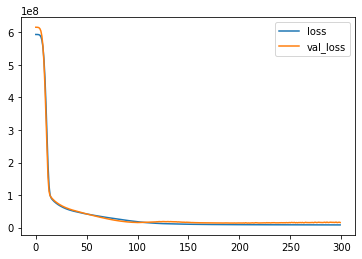

In [73]:
LostData.plot()

In [74]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [75]:
tahmindizisi=model.predict(x_test)

In [76]:
mean_absolute_error(y_test,tahmindizisi)

3017.9146460030274

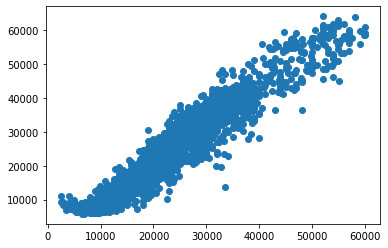

In [77]:
plt.scatter(y_test,tahmindizisi)

In [78]:
AudiData.iloc[10]

year                2014.0
price              59990.0
mileage            31930.0
tax                  580.0
mpg                   21.9
engineSize             5.2
Trans_Automatic        1.0
Trans_Manual           0.0
Trans_Semi-Auto        0.0
Ftype_Diesel           0.0
Ftype_Hybrid           0.0
Ftype_Petrol           1.0
model_ A1              0.0
model_ A2              0.0
model_ A3              0.0
model_ A4              0.0
model_ A5              0.0
model_ A6              0.0
model_ A7              0.0
model_ A8              0.0
model_ Q2              0.0
model_ Q3              0.0
model_ Q5              0.0
model_ Q7              0.0
model_ Q8              0.0
model_ R8              1.0
model_ RS3             0.0
model_ RS4             0.0
model_ RS5             0.0
model_ RS6             0.0
model_ RS7             0.0
model_ S3              0.0
model_ S4              0.0
model_ S5              0.0
model_ S8              0.0
model_ SQ5             0.0
model_ SQ7             0.0
m

In [79]:
yeniarabaSeries=AudiData.drop("price",axis=1).iloc[10]

In [80]:
yeniarabaSeries=scaler.transform(yeniarabaSeries.values.reshape(-1,37))

In [81]:
model.predict(yeniarabaSeries)

array([[63875.184]], dtype=float32)

In [82]:
model.save("AudiModel.h5")

In [83]:
import joblib

In [84]:
joblib.dump(scaler, 'Audiscaler.save')

['Audiscaler.save']